In [17]:
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
np.random.seed(1) # Set the random seed for reproduceability
from sklearn.model_selection import train_test_split

In [18]:
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.set_index('date')

ped = ped.drop(["time", "Unnamed: 0"], axis = 1)

standardize = lambda x: (x - x.mean()) / x.std() # writing function to standardize
ped["temperature in ºc"] = standardize(ped["temperature in ºc"])

#Features of our dataset
X = ped[ped.columns[1:]]
# Output to predict
y = ped["pedestrians count"]
X

,temperature in ºc,holiday,school holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,-0.618529,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,-0.748505,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,-0.748505,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,-0.748505,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,-0.878482,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,-0.228598,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-01-31,-0.228598,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-31,-0.358575,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [20]:
# Import the multilayer perceptron regressor and classifier from sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
# Import a helper to scale our data
from sklearn.preprocessing import StandardScaler

In [21]:
# Initialize a neural network to predict the crop yields given the temperature
# Use three hidden layers, with sizes 32, 64, and 32, ReLU activation functions,
# stochastic gradient descent optimization and a regularization paramater
# (lambda or alpha) of 0.001, batchsizes of 32 and 1000 epochs
nnet = MLPRegressor(hidden_layer_sizes=(32, 64, 32), activation="relu", solver="sgd",
                    alpha=0.001, batch_size=32, max_iter=1000)

In [22]:
# Scale the inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Scale the outputs (we cannot use StandardScaler() on a 1D array)
mu, sigma = y.mean(), y.std() # We will use this to scale back to original values!
y = (y - mu) / sigma

In [23]:
# Fit the network
nnet.fit(X, y)

# Make predictions
ypred = nnet.predict(X)

# Reconstruct outputs and scale predictions
y = y * sigma + mu
ypred = ypred * sigma + mu

# Compute the MAE
mae = np.sum(np.abs(ypred - y))

print(f"The mean absolute error is {mae}")

The mean absolute error is 6108017.063413951


In [36]:
y.shape

(15358,)

In [26]:
# Create a prediction on the min to the max features (for plotting)
xmin, xmax = X.min(), X.max()
xs = np.linspace(X.min(), X.max(), 5400)
# Predict and scale back to original range for the plot
ys = nnet.predict(xs.reshape(-54, 54)) * sigma + mu

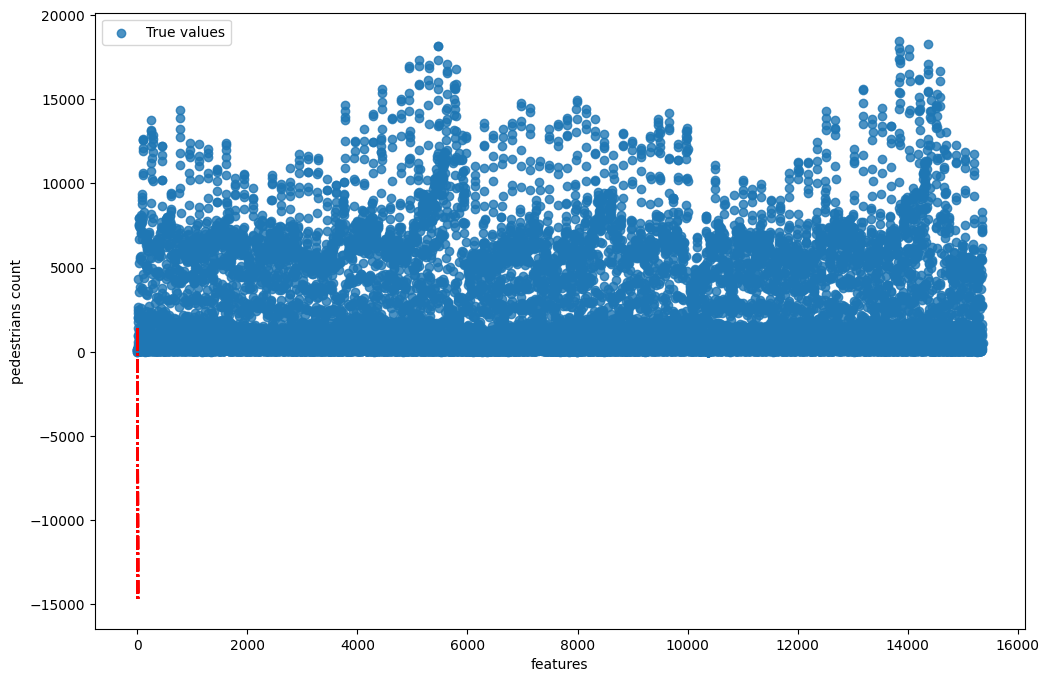

In [41]:
xs2 = np.linspace(0, y.shape[0], y.shape[0])
ys2 = np.linspace(0, ypred.shape[0], ypred.shape[0])
# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the true values
ax.scatter(xs2, y, label="True values", alpha=0.8)
# Plot the predictions
ax.plot(
    scaler.inverse_transform(xs.reshape(-54, 54)),
    ys, color="red", linestyle="dashdot")

# Add labels and legend
ax.set_xlabel("features")
ax.set_ylabel("pedestrians count")
ax.legend()